<h1>Chapter 8: Define global cellular states and make global Onco-GPS map</h1>

<br>
<div>
    <img src="../media/method_chap7.png" width=2144 height=1041>
</div>

### Analysis overview
In this chapter we generate a more complex “global” Onco-GPS maps using all the 9 KRAS components. In the next chapter we will use this global Onco-GPS to visualize the association of selected pathway and gene expression.

### 1. Set up notebook and import [CCAL](https://github.com/KwatME/ccal)

In [5]:
from notebook_environment import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Read and plot H matrix

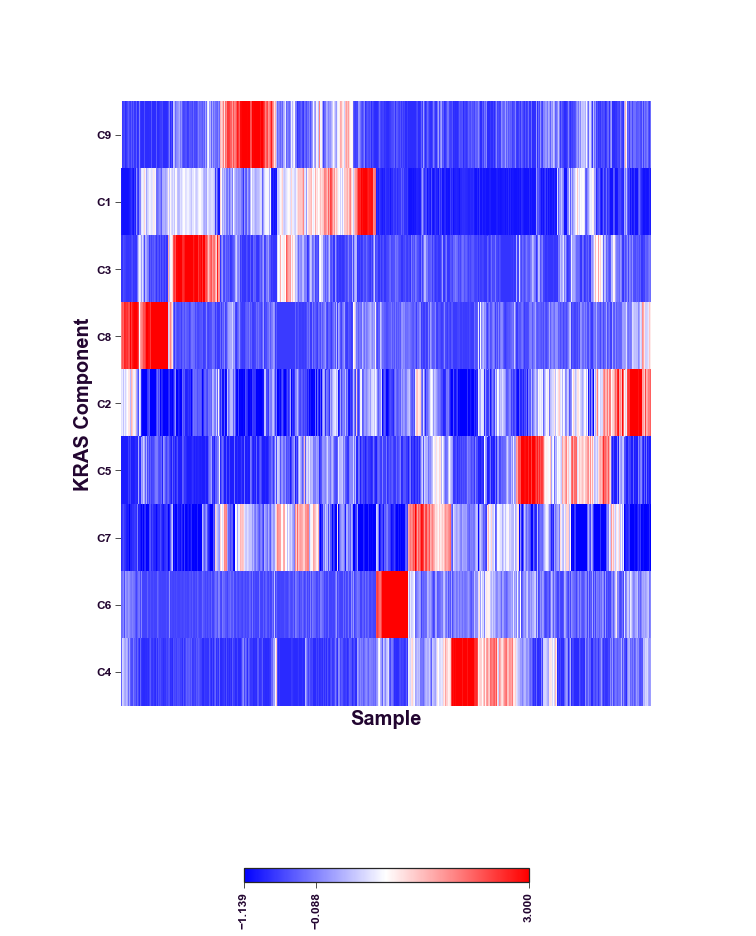

In [4]:
h_matrix = pd.read_table('../results/nmfccs/nmf_k9_h.txt', index_col=0)

ccal.plot_heatmap(
    h_matrix,
    normalization_method='-0-',
    normalization_axis=1,
    cluster=True,
    xlabel='Sample',
    ylabel='KRAS Component',
    xticklabels=False)

### 3. Define the oncogenic states

Cluster all samples in the refrence dataset using all the 9 components. Based the Consensus-Clustering-Cophenetic-Correlation coefficients Vs. k plot below, we choose a stable solution with large number of states to have increased resolution. We chose k=15.

In [4]:
# '-0-' normalize each row
a = ccal.normalize_2d_array(h_matrix.values, '-0-', axis=1)

# Clip values 3 standard deviation away from each row
a = a.clip(min=-3, max=3)

# '0-1' normalize each row
a = ccal.normalize_2d_array(a, '0-1', axis=1)

h_matrix = pd.DataFrame(a, index=h_matrix.index, columns=h_matrix.columns)

# ds, hcs, cs, cccs = ccal.define_states(
#     h_matrix,
#     range(5, 17),
#     n_clusterings=30,
#     random_seed=830574,
#     directory_path='../results/global_hccs')

### 4. Plot H matrix clustering by state

In [5]:
cs = pd.read_table('../results/global_hccs/hccs.txt', index_col=0)

In [6]:
sample_states = cs.loc['K15']

In [7]:
component_names = [
    'C1 ERBB3/PI3K',
    'C3 RAS/WNT/PI3K',
    'C9 KRAS/AP1',
    'C8 MYC',
    'C6 BRAF/MAPK',
    'C7 TNF/NFkB',
    'C5 HNF1/PAX8',
    'C2 MYC/E2F',
    'C4 EMT',
]

In [8]:
colors = [
    '#993300',
    '#FFD700',
    '#E74C3C',
    '#8B008B',
    '#B0E0E6',
    '#4169E1',
    '#DC143C',
    '#669999',
    '#F4BD60',
    '#2E8B57',
    '#4b0082',
    '#D2691E',
    '#FA8072',
    '#DA70D6',
    '#90EE90',
]

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


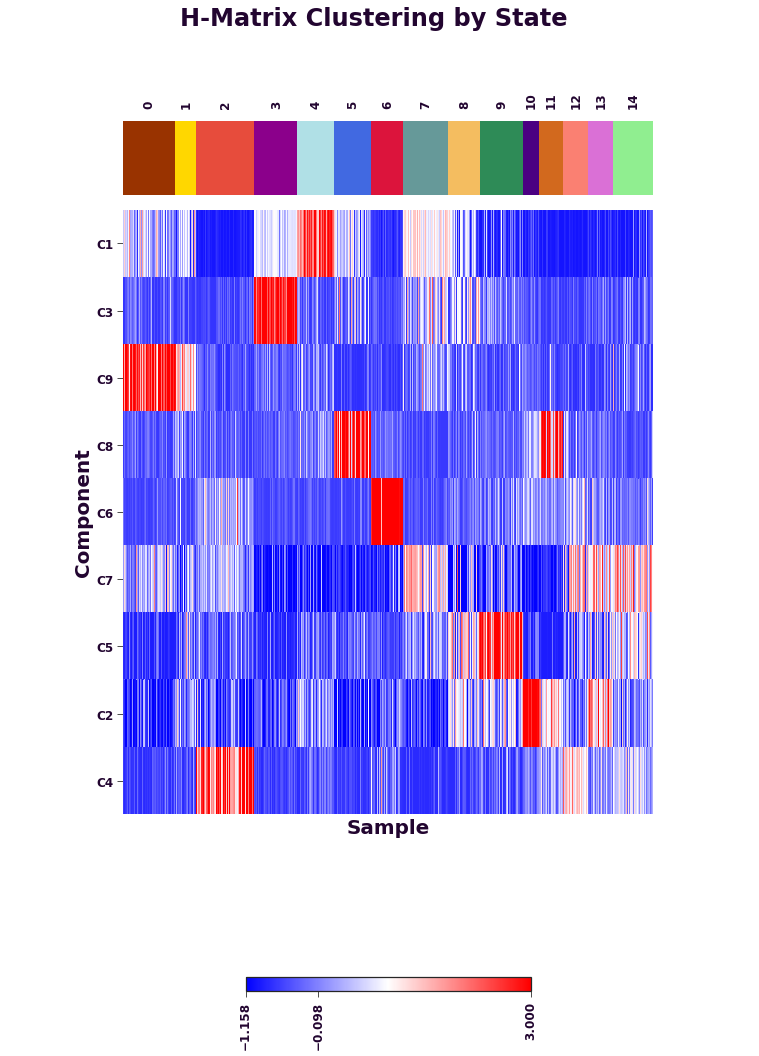

In [9]:
ccal.plot_heatmap(
    h_matrix,
    normalization_method='-0-',
    normalization_axis=1,
    data_type='continuous',
    annotation_colors=colors,
    column_annotation=sample_states,
    title='H-Matrix Clustering by State',
    xlabel='Sample',
    ylabel='Component',
    xticklabels=False)

### 5. Plot global Onco-GPS map 
This is Fig S1 in the article.

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


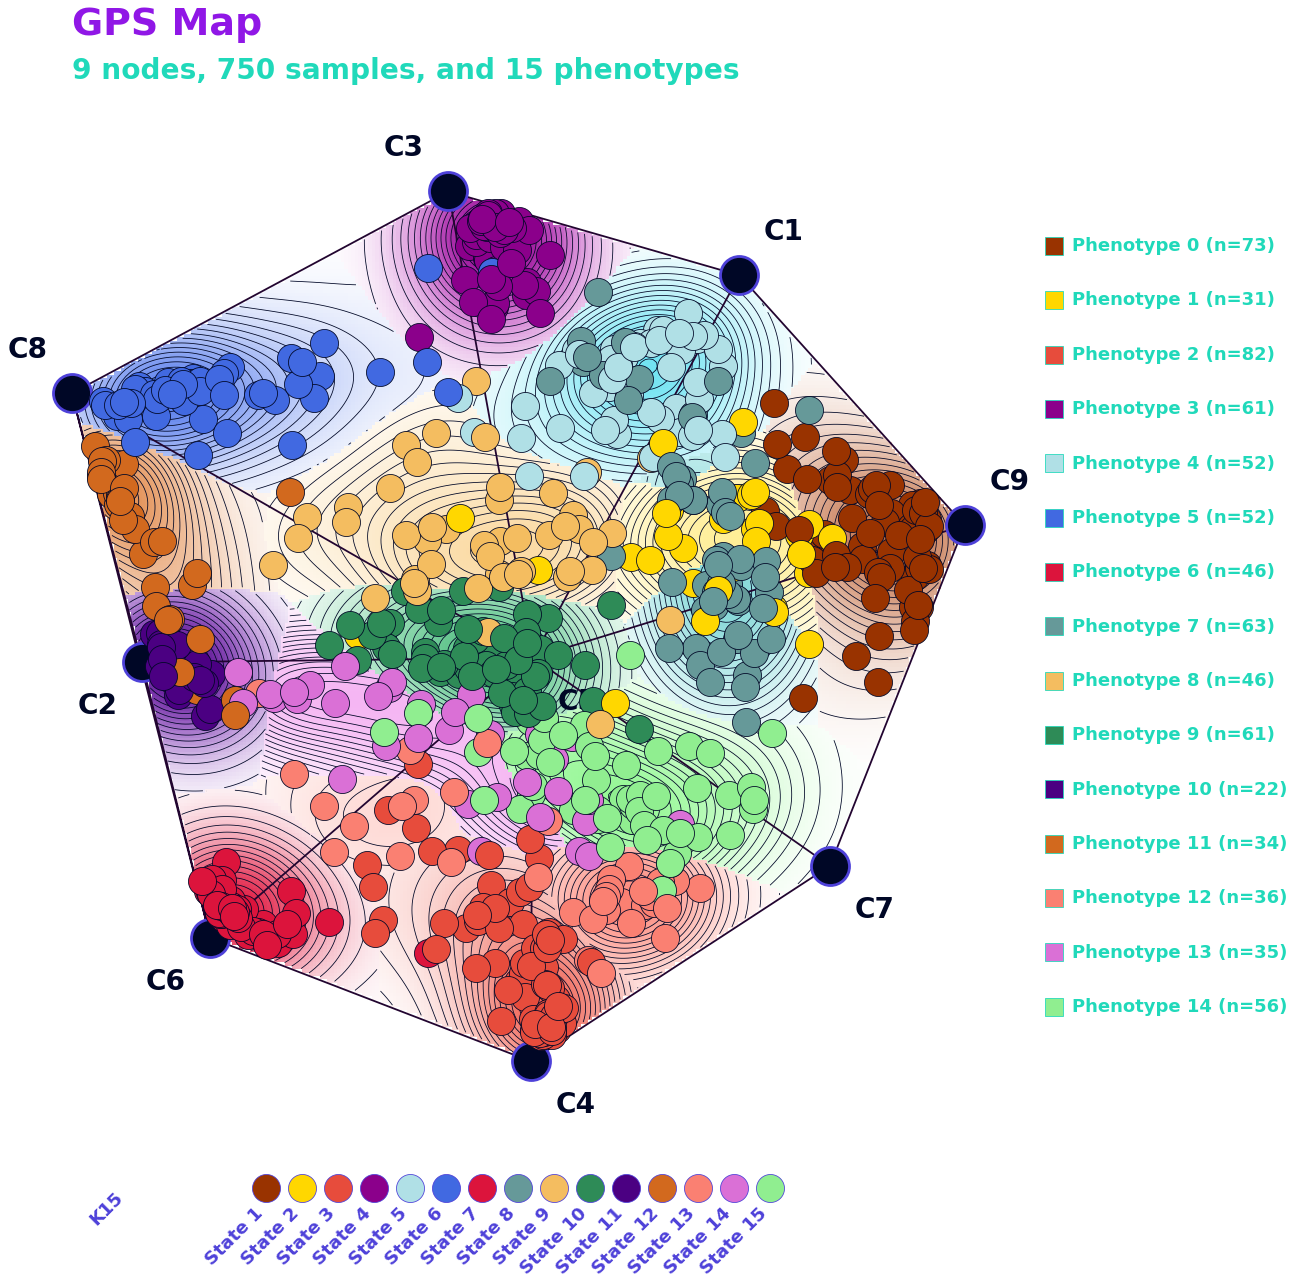

In [10]:
gps_map = ccal.GPSMap(h_matrix, pull_power=2, mds_random_seed=14)

gps_map.set_sample_phenotypes(
    sample_states,
    phenotype_type='categorical',
    bandwidth_factor=2.8,
    phenotype_color_map=mpl.colors.ListedColormap(colors),
    phenotype_to_str={i: 'State {}'.format(i + 1)
                      for i in range(15)}, )

gps_map.plot_samples_with_phenotype()

gps_map.save('../results/global_gps_map.pickle.gz')

### [Next chapter (9)](9 Display genomic features on global Onco-GPS map.ipynb)